# Word counts and word co-occurrence networks 
Preparing for word counts and word co-occurrence networks

In [423]:
# import libraries
import re
import itertools
import unicodedata
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt

In [424]:
# set directory 
os.getcwd()
os.chdir('/Users/Sofie/Disney Thesis')

# import clean scripts
all_scripts = pd.read_pickle("all_scripts_cleaned_total.pickle")

In [425]:
# list of often used words to be removed
often_used = ["know", "look", "come", "like", "right", "okay", "got", "hey", "hmm", "huh"]

In [426]:
# make all lines into list of words
clean_lines = []
for line in all_scripts['Clean_Line_list']:
    line = [i for i in line if i]
    # remove most often used words similar to stop words
    line = [word for word in line if word not in often_used]
    
    clean_lines.append(line)
 
all_scripts['Clean_Line_list'] = clean_lines


In [427]:
# merge list of words back into sentences after cleaning 
all_lines = []
for liste in all_scripts['Clean_Line_list']:
    
    # merge list back into sentences
    liste = ' '.join(liste)
    all_lines.append(liste)

all_scripts['Clean_Line'] = all_lines
all_scripts.head()

,Era,Movie,Character,Line,Gender,Group,Words_n,dialouge_lenght,Dialouge,Clean_Line_all,Clean_Line_list,Clean_Line
0,The Golden Age,Snow White and the Seven Dwarfs,narrator,"Once upon a time, there lived a lovely little ...",Male,Single,48,0,False,"once upon a time, there lived a lovely little ...","[upon, time, lived, lovely, little, named, vai...",upon time lived lovely little named vain wicke...
1,The Golden Age,Snow White and the Seven Dwarfs,narrator,"Each day, the vain Queen consulted her Magic M...",Male,Single,44,2,True,"each day, the vain queen consulted her magic m...","[day, vain, consulted, magic, mirror, magic, m...",day vain consulted magic mirror magic mirror w...
2,The Golden Age,Snow White and the Seven Dwarfs,grimhilde,"Slave in the Magic Mirror, come from the farth...",Female,Single,10,0,False,"slave in the magic mirror, come from the farth...","[slave, magic, mirror, farthest, space]",slave magic mirror farthest space
3,The Golden Age,Snow White and the Seven Dwarfs,grimhilde,"Through wind and darkness, I summon thee. Speak!",Female,Single,8,0,False,"through wind and darkness, i summon thee. speak!","[wind, darkness, summon, thee, speak]",wind darkness summon thee speak
4,The Golden Age,Snow White and the Seven Dwarfs,grimhilde,Let me see thy face.,Female,Single,5,3,True,let me see thy face.,"[let, see, thy, face]",let see thy face


# Word Count

In [428]:
# save man and woman data
all_scripts_m = all_scripts.loc[all_scripts['Gender'] == "Male"]
all_scripts_f = all_scripts.loc[all_scripts['Gender'] == "Female"]

In [429]:
#word count for men characters
word_cnt_m = {}
for words in all_scripts_m["Clean_Line_list"]:
    for word in words:
        if word not in word_cnt_m:
            word_cnt_m[word] = 1
        else:
            word_cnt_m[word] += 1

    
word_cnt_df_m = pd.DataFrame({'word': [k for k in word_cnt_m.keys()], 'cnt': [v for v in word_cnt_m.values()]})
word_cnt_df_m['pct'] = word_cnt_df_m['cnt'] /len(word_cnt_df_m)

print("Number of words:", len(word_cnt_df_m))
print("Number of words (if word occurs min. 5 times):", len(word_cnt_df_m.loc[word_cnt_df_m['cnt']>=5]))

Number of words: 12933
Number of words (if word occurs min. 5 times): 3008


In [430]:
#word count for women characters
word_cnt_f = {}
for words in all_scripts_f["Clean_Line_list"]:
    for word in words:
        if word not in word_cnt_f:
            word_cnt_f[word] = 1
        else:
            word_cnt_f[word] += 1

    
word_cnt_df_f = pd.DataFrame({'word': [k for k in word_cnt_f.keys()], 'cnt': [v for v in word_cnt_f.values()]})
word_cnt_df_f['pct'] = word_cnt_df_f['cnt'] /len(word_cnt_df_f)

print("Number of words:", len(word_cnt_df_f))
print("Number of words (if word occurs min. 5 times):", len(word_cnt_df_f.loc[word_cnt_df_f['cnt']>=5]))



Number of words: 7930
Number of words (if word occurs min. 5 times): 1764


In [431]:
# descriptive statistics for word count - men
word_cnt_df_m[['cnt']].describe()

,cnt
count,12933.000000
mean,9.127735
std,49.043728
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,2173.000000


In [432]:
# descriptive statistics for word count - women
word_cnt_df_f[['cnt']].describe()

,cnt
count,7930.000000
mean,7.105422
std,31.405203
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,1438.000000


## Top 40 words for male and female characters

In [397]:
# top 40 
female = word_cnt_df_f.sort_values(by='pct', ascending=False)[:40]
male = word_cnt_df_m.sort_values(by='pct', ascending=False)[:40]

# top words 
uni_words = ['good', 'please', 'love', 'thank', 'dear', 'away', 'life',
            'old', 'guy', 'give', 'whoa', 'great', 'time', 'let'] 

,word,cnt,pct,uni
110,get,665,0.084670,0
24,well,541,0.068882,0
14,one,468,0.059587,0
8,let,411,0.052330,1
54,back,391,0.049784,0
9,see,379,0.048256,0
191,yes,374,0.047619,0
104,good,313,0.039852,1
323,think,311,0.039598,0
138,little,307,0.039088,0


In [434]:
female[female['word'].isin(uni_words)]

,word,cnt,pct,uni
61,please,269,0.034250,1
31,love,259,0.032977,1
768,thank,171,0.021772,1
177,dear,163,0.020754,1
70,away,156,0.019862,1
83,life,152,0.019353,1


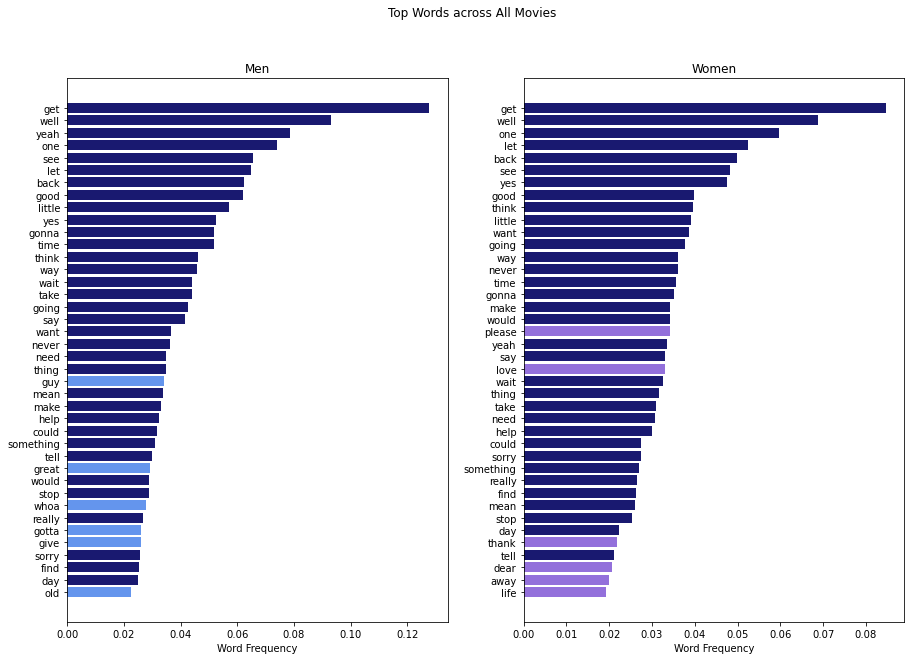

In [406]:
# top 40 
female = word_cnt_df_f.sort_values(by='pct', ascending=False)[:40]
male = word_cnt_df_m.sort_values(by='pct', ascending=False)[:40]

# top words 
uni_words = ['please', 'love', 'thank', 'dear', 'away', 'life',
            'old', 'guy', 'give', 'whoa', 'great', 'gotta'] 

female['uni'] = np.where(female["word"].isin(uni_words), 1, 0)
male['uni'] = np.where(male["word"].isin(uni_words), 1, 0)


colours = {1: "mediumpurple", 0: "midnightblue"}
colours_2 = {1: "cornflowerblue", 0: "midnightblue"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle('Top Words across All Movies')

ax1.barh(male['word'],male['pct'], color = male['uni'].replace(colours_2))
ax1.invert_yaxis()
ax1.set_xlabel('Word Frequency')
ax1.set_title('Men')

ax2.barh(female['word'],female['pct'], color = female['uni'].replace(colours))
ax2.invert_yaxis()  # labels read top-to-bottom'
ax2.set_xlabel('Word Frequency')
ax2.set_title('Women')
#ax.barh(y_pos, performance, xerr=error, align='center')

plt.savefig('most_used_words.png')
plt.show()




# Word co-occurrence networks for most speaking male and female character

In [435]:
# find characters using the largest share of words 
top_words = all_scripts.groupby(["Movie", "Gender", "Character"])\
.agg({"Words_n" : "sum"})\
.groupby(level=0).apply(lambda x: 100*x/x.sum())\
.sort_values(by=["Movie", "Gender", "Words_n"], ascending=[True, True, False]).reset_index()

# find the most speaking female and male character 
top_words_f = top_words.loc[top_words['Gender'] == "Female"].groupby('Movie').head(1)
top_words_m = top_words.loc[top_words['Gender'] == "Male"].groupby('Movie').head(1)
#top_words_f = top_words_f.rename(columns={'Gender': 'F_most_words', 'Character': 'F_Character', 'Line': 'F_Most_words_sum'})
#top_words_m = top_words_m.rename(columns={'Gender': 'M_most_words', 'Character': 'M_Character', 'Line': 'M_Most_words_sum'})

In [436]:
all_scripts = all_scripts.reset_index(drop=True)

In [437]:
# take top words for both men and women
tops = top_words_m.append(top_words_f, ignore_index=True)
tops = tops.rename(columns={'Words_n': 'Words_pct'})


In [442]:
tops['Most_speaking_char'] = 1

In [464]:
main_char_lines =  pd.merge(all_scripts, tops, on=['Movie', 'Character', 'Gender'])

In [465]:
# creating a male and female dataset for most speaking characters 
main_char_lines_m = main_char_lines.loc[main_char_lines['Gender'] == "Male"]
main_char_lines_f = main_char_lines.loc[main_char_lines['Gender'] == "Female"]

In [446]:
# word count 

word_cnt_m = {}
for words in main_char_lines_m['Clean_Line_list']:
    for word in words:
        if word not in word_cnt_m:
            word_cnt_m[word] = 1
        else:
            word_cnt_m[word] += 1
    
word_cnt_df_m = pd.DataFrame({'word': [k for k in word_cnt_m.keys()], 'cnt': [v for v in word_cnt_m.values()]})
print("Number of words:", len(word_cnt_df_m))
word_cnt_df_m = word_cnt_df_m.loc[word_cnt_df_m['cnt']>=10]
print("Number of words:", len(word_cnt_df_m))

word_cnt_f = {}
for words in main_char_lines_f['Clean_Line_list']:
    for word in words:
        if word not in word_cnt_f:
            word_cnt_f[word] = 1
        else:
            word_cnt_f[word] += 1
    
word_cnt_df_f = pd.DataFrame({'word': [k for k in word_cnt_f.keys()], 'cnt': [v for v in word_cnt_f.values()]})
print("Number of words:", len(word_cnt_df_f))
word_cnt_df_f = word_cnt_df_f.loc[word_cnt_df_f['cnt']>=10]
print("Number of words:", len(word_cnt_df_f))

Number of words: 6443
Number of words: 672
Number of words: 4870
Number of words: 519


In [447]:
freq_words = []
for words in main_char_lines_f['Clean_Line_list']:
    words_line = []
    for word in words:
        if word in list(word_cnt_df_f['word']):
            words_line.append(word)
    words_line = ' '.join(words_line)
    freq_words.append(words_line)

main_char_lines_f['Freq_words'] = freq_words

freq_words = []
for words in main_char_lines_m['Clean_Line_list']:
    words_line = []
    for word in words:
        if word in list(word_cnt_df_m['word']):
            words_line.append(word)
    words_line = ' '.join(words_line)
    freq_words.append(words_line)

main_char_lines_m['Freq_words'] = freq_words


<ipython-input-447-0ba0f4c29c04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_char_lines_f['Freq_words'] = freq_words
<ipython-input-447-0ba0f4c29c04>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_char_lines_m['Freq_words'] = freq_words


In [324]:
# sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
# matrix of token counts
X = cv.fit_transform(main_char_lines_m['Freq_words'])
Xc = (X.T * X) # matrix manipulation
Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1

names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df_m = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

cols = list(df_m.columns)
df_m[cols] = df_m[cols].replace({'1':0, 1:0})
df_m[cols] = df_m[cols].replace({'2':0, 2:0})
df_m[cols] = df_m[cols].replace({'3':0, 3:0})


df_m.to_csv('to_gephi_co-occ_male.csv', sep = ',')


# sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
# matrix of token counts
X = cv.fit_transform(main_char_lines_f['Freq_words'])
Xc = (X.T * X) # matrix manipulation
Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1

names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df_f = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

cols = list(df_f.columns)
df_f[cols] = df_f[cols].replace({'1':0, 1:0})
df_f[cols] = df_f[cols].replace({'2':0, 2:0})
df_f[cols] = df_f[cols].replace({'3':0, 3:0})

df_f.to_csv('to_gephi_co-occ_female.csv', sep = ',')


In [ ]:
# to gephi
# https://medium.com/@615162020027/centrality-and-community-detection-in-macaque-rhesus-brain-networks-with-gephi-0-9-2-ed62cb4d0cf8

# Word Co-occurrence across Eras for Leading Characters (men and women)

We perform word co-occurrences across eras too

In [476]:
def word_cnt(word_list, min_words=5): 
    # give dataframe column with list of words, minimum times word shall be occuring
    
    word_cnt = {}
    for words in word_list:
        for word in words:
            if word not in word_cnt:
                word_cnt[word] = 1
            else:
                word_cnt[word] += 1
        
    word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
    print("Number of words:", len(word_cnt_df))
    word_cnt_df = word_cnt_df.loc[word_cnt_df['cnt']>= min_words]
    print("Number of words if occuring 5 times or more:", len(word_cnt_df))
    return(word_cnt_df)

In [468]:
def freq_word(word_list, frequent_words): # word_cnt_df_f['word']
    
    freq_words = []
    for words in word_list:
        words_line = []
        for word in words:
            if word in list(frequent_words):
                words_line.append(word)
        words_line = ' '.join(words_line)
        freq_words.append(words_line)
    return(freq_words)

#main_char_lines_f['Freq_words'] = freq_words

In [469]:
# sklearn countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

def to_gephi(words, name): #main_char_lines['Freq_words'], golden_age_female
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english')
    # matrix of token counts
    X = cv.fit_transform(words)
    Xc = (X.T * X) # matrix manipulation
    Xc.setdiag(0) # set the diagonals to be zeroes as it's pointless to be 1
    
    names = cv.get_feature_names() # This are the entity names (i.e. keywords)
    df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
    
    cols = list(df.columns)
    df[cols] = df[cols].replace({'1':0, 1:0})
    df[cols] = df[cols].replace({'2':0, 2:0})
    df[cols] = df[cols].replace({'3':0, 3:0})
    
    filename = name + '_to_gephi_co-occurrance.csv'
    df.to_csv(filename, sep = ',')
    
    

In [488]:
# SET WD
os.chdir('/Users/Sofie/Disney Thesis/Word_Co_Occurence_NW')

eras = all_scripts['Era'].unique()
#eras = "The Bronze Age"
# print female networks
for era in eras:
    data = main_char_lines_f.loc[main_char_lines_f['Era'] == era].reset_index(drop=True)
    word_cnt_df = word_cnt(data['Clean_Line_list'], 5)
    word_cnt_df = word_cnt_df.reset_index(drop=True)
    data['Freq_words'] = freq_word(data['Clean_Line_list'], word_cnt_df['word'])
    name = "female_" + era
    to_gephi(data['Freq_words'], name)
    

Number of words: 1183
Number of words if occuring 5 times or more: 171
Number of words: 1042
Number of words if occuring 5 times or more: 122
Number of words: 1339
Number of words if occuring 5 times or more: 145
Number of words: 1795
Number of words if occuring 5 times or more: 258
Number of words: 2241
Number of words if occuring 5 times or more: 449
Number of words: 1034
Number of words if occuring 5 times or more: 135


In [490]:
for era in eras:
    data = main_char_lines_m.loc[main_char_lines_m['Era'] == era].reset_index(drop=True)
    word_cnt_df = word_cnt(data['Clean_Line_list'], 5)
    word_cnt_df = word_cnt_df.reset_index(drop=True)
    data['Freq_words'] = freq_word(data['Clean_Line_list'], word_cnt_df['word'])
    name = "male_" + era
    to_gephi(data['Freq_words'], name)

Number of words: 1603
Number of words if occuring 5 times or more: 238
Number of words: 1628
Number of words if occuring 5 times or more: 190
Number of words: 2126
Number of words if occuring 5 times or more: 303
Number of words: 2763
Number of words if occuring 5 times or more: 412
Number of words: 2485
Number of words if occuring 5 times or more: 450
Number of words: 931
Number of words if occuring 5 times or more: 132
